In [65]:
import pandas as pd
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


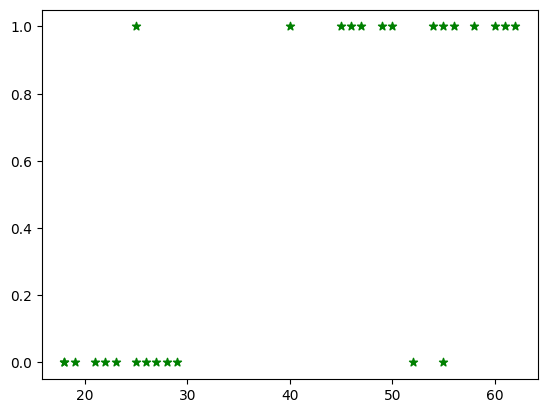

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.age,df.bought_insurance,marker='*',color='green')

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [68]:
x_test

,age
1,25
17,58
6,55
4,46
3,52
9,61


In [69]:
x_train

,age
12,27
13,29
10,18
18,19
15,55
20,21
2,47
22,40
7,60
26,23


In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [71]:
model.fit(x_train, y_train)

LogisticRegression()

In [72]:
model.predict(x_test)

array([0, 1, 1, 1, 1, 1])

In [73]:
model.score(x_test,y_test)

0.6666666666666666

In [74]:
model.predict_proba(x_test)

array([[8.95813433e-01, 1.04186567e-01],
       [3.05542813e-04, 9.99694457e-01],
       [7.75069902e-04, 9.99224930e-01],
       [1.25205711e-02, 9.87479429e-01],
       [1.96470041e-03, 9.98035300e-01],
       [1.20414744e-04, 9.99879585e-01]])

In [75]:
model.predict([[40]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [76]:
df.shape

(27, 2)

In [77]:
# excercise on HR analytics
import pandas as pd
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [78]:
print(df.groupby('salary')['left'].mean())
print(df.groupby('Department')['left'].mean())
print(df.groupby('left').mean(numeric_only=True))


salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64
Department
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64
      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


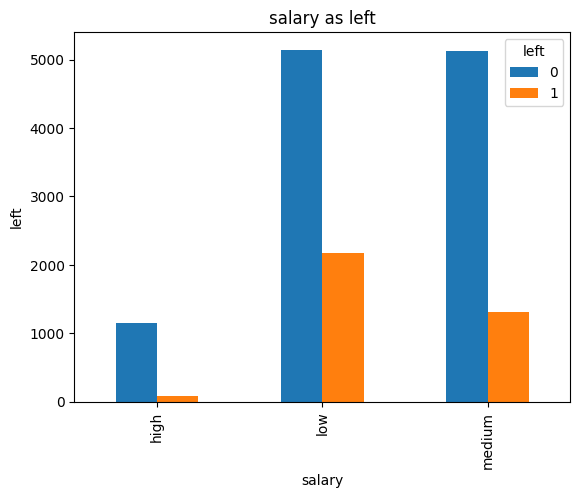

In [79]:
import matplotlib.pyplot as plt
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.title('salary as left')
plt.xlabel('salary')
plt.ylabel('left')
plt.show()


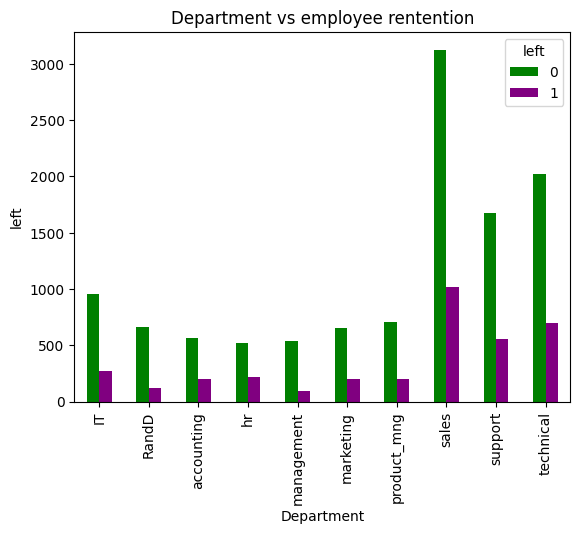

In [80]:
import matplotlib.pyplot as plt
pd.crosstab(df.Department,df.left).plot(kind='bar', color=['green', 'purple', 'black'])
plt.title('Department vs employee rentention')
plt.xlabel('Department')
plt.ylabel('left')
plt.show()

In [83]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [82]:
dummies = pd.get_dummies(subdf.salary,prefix = 'salary', dtype= int)
dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [84]:
merged = pd.concat([subdf,dummies],axis = 'columns')
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [85]:
final = merged.drop(['salary'],axis='columns')
final

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [89]:
x = final
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [91]:
y = df.left
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3)

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [95]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [96]:
model.fit(x,y)

LogisticRegression(max_iter=1000)

In [97]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 1, 0])

In [61]:
model.score(x_test,y_test)

0.7796190476190477